# Question 1

## Introduction

We commonly perceive that classifying a nominal label variable with multiple categories is always a more challenging problem than classifying a binary label variable.  Although our perception is supported by our experience most of the time, there are surprises.  We will work through one counter-example in this assignment.
We will study how well a Support Vector Machine model can identify the features of a face.  The facial features are, in this order, Right Eye, Left Eye, Nose, and Mouth.  The data is Face.csv.  This data contains the two-dimensional Cartesian coordinates of the face of a nondescript robot.  There are three columns in Face.csv.  The horizontal column contains the x-coordinates, the vertical column contains the y-coordinates, and the feature column contains the names of the facial features.
 


We will train a multi-class linear Support Vector Machine model that uses the x-coordinate and the y-coordinate to predict facial features.  The random seed value is 202431008.  The maximum number of iterations is 10,000.  Furthermore, we aim to push the accuracy as high as possible by fine-tuning the regularization parameter. To this end, we will search for the smallest regularization parameter value from 0.01 to 10 with an increment of 0.01 that yields the highest accuracy.

a)	(20 points) Train a Support Vector Machine model on the original Cartesian coordinates to identify the four facial features.  What is the regularization parameter value that yields the highest accuracy?  What are the general form equations of the linear separators?  What is the accuracy rate?


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

from scipy.stats import norm, randint
from sklearn import metrics, svm

# Encode the 'feature' column
label_encoder = LabelEncoder()

face_data = pd.read_csv('Face.csv')
face_data['feature_encoded'] = label_encoder.fit_transform(face_data['feature'])

face_data['feature'].unique()

array(['Left Eye', 'Right Eye', 'Nose', 'Mouth'], dtype=object)

In [70]:
face_data.head()
#face_data.describe()

,horizontal,vertical,feature,feature_encoded
0,-1.20,0.763,Left Eye,0
1,-1.20,0.763,Left Eye,0
2,-1.15,0.543,Left Eye,0
3,-1.15,0.983,Left Eye,0
4,-1.10,0.463,Left Eye,0


In [71]:
# Split the data into features (X) and target (y)
X_train = face_data[['horizontal', 'vertical']]
y_train = face_data['feature_encoded']


# Range of C values to test
C_values = np.arange(0.01, 10.01, 0.01)
results=[]

# Train SVM models with different C values
for i in C_values:
    # Create and train the SVM model
    svm_model = svm.LinearSVC(dual = False, C=i, max_iter=10000, random_state=202431008)
    thisFit=  svm_model.fit(X_train, y_train)
    y_pred_train = thisFit.predict(X_train)
    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    results.append({'C': round(i, 2), 'Accuracy': accuracy})

results = pd.DataFrame(results)
sorted_results=results.sort_values(by=['Accuracy', 'C'], ascending=[False, True], inplace=False)
sorted_results

,C,Accuracy
118,1.19,0.992248
119,1.20,0.992248
120,1.21,0.992248
121,1.22,0.992248
122,1.23,0.992248
...,...,...
2,0.03,0.782946
3,0.04,0.782946
4,0.05,0.782946
0,0.01,0.775194


In [72]:
sorted_results.iloc[0]

C           1.190000
Accuracy    0.992248
Name: 118, dtype: float64

In [73]:
# Best Fit when C = 1.19
best_C = sorted_results.iloc[0]['C']
best_accuracy = sorted_results.iloc[0]['Accuracy']

# Train the SVM model with the best C value
optimal_svm_model = svm.LinearSVC(dual = False, C=best_C, max_iter=10000, random_state=202431008)
BestFit=optimal_svm_model.fit(X_train, y_train)

#Accuracy
y_pred_train =BestFit.predict(X_train)
accuracy =metrics.accuracy_score(y_train,y_pred_train)


print("Regularization parameter value that yields the highest accuracy =", best_C)
print("Accuracy rate:", best_accuracy)
print('Intercept = ', BestFit.intercept_)
print('Coefficients = ', BestFit.coef_)


Regularization parameter value that yields the highest accuracy = 1.19
Accuracy rate: 0.9922480620155039
Intercept =  [-1.26186594 -2.90434602 -0.51772821 -1.26186594]
Coefficients =  [[-3.00422662e+00  1.44872797e+00]
 [-7.91068868e-17 -2.11900227e+00]
 [ 2.24260004e-17 -2.36178737e-01]
 [ 3.00422662e+00  1.44872797e+00]]


In [74]:
for i in range(0, 4, 1):
  eq_str = str(BestFit.intercept_[i]) + ' + ' + str(BestFit.coef_[i][0]) + ' * X + ' + str(BestFit.coef_[i][1]) + ' * Y = 0'
  print(eq_str)

-1.2618659369837792 + -3.0042266171017333 * X + 1.4487279718882886 * Y = 0
-2.904346024689706 + -7.910688677569467e-17 * X + -2.1190022671402944 * Y = 0
-0.5177282139150063 + 2.242600044716614e-17 * X + -0.23617873681661494 * Y = 0
-1.2618659369837792 + 3.0042266171017333 * X + 1.4487279718882886 * Y = 0


b)	(10 points) Generate a scatterplot of the y-coordinate and the x-coordinate with the proper legend labels.  You must color-code the markers according to the predicted facial features.  Also, add the linear separators as a dotted line on the scatterplot.

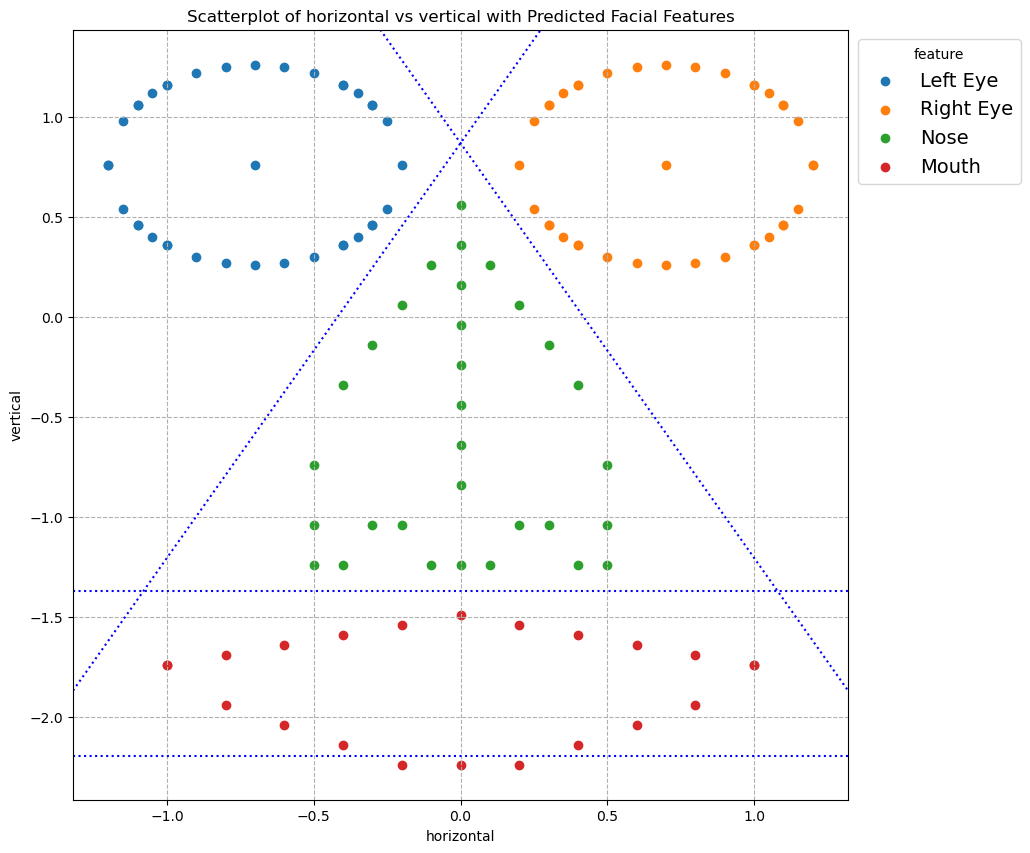

In [75]:
plt.figure(figsize=(10,10))
face_feature = face_data['feature'].unique()

# Create new order of ordered_face_feature
ordered_face_feature = {feature: order for order, feature in enumerate(face_feature)}

# A fixed point on the horizontal axis
h_point = X_train['horizontal'].mean()

# Add linear separators as dotted lines
lsty = ':'
for feature, j in ordered_face_feature.items():
   plot_data = face_data[face_data['feature'] == feature]
   plt.scatter(plot_data['horizontal'], plot_data['vertical'], label = feature)
   w = BestFit.coef_[j,:]
   line_slope = - w[0] / w[1]
   v_point = line_slope * h_point - (BestFit.intercept_[j]) / w[1]
   plt.axline((h_point, v_point), slope = line_slope, linestyle = lsty, color = 'blue')
    
# Set plot labels, title, legend
plt.xlabel('horizontal')
plt.ylabel('vertical')
plt.title('Scatterplot of horizontal vs vertical with Predicted Facial Features')
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'feature', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.show()

c)	(10 points) Since the label variable has four categories, the Support Vector Machine model should produce four linear separators.  Which of the four linear separators do you think is redundant?  Can you provide us with an explanation?

d)	(10 points) Calculate the decision function values for every observation for all four linear separators. Generate a boxplot of the decision function values of each linear separator.  To facilitate comparison, please put all four boxplots in a single chart.  If the decision function values of a linear separator are practically all positive or negative, this is a sign that the corresponding linear separator can be deemed redundant.
 


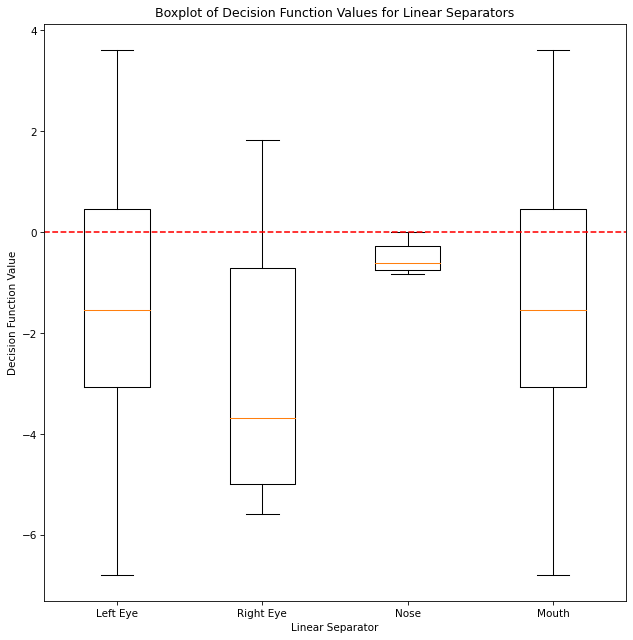

In [76]:
decision = BestFit.decision_function(X_train)
plt.figure(figsize = (10,10), dpi = 75)
plt.boxplot(decision, labels = face_feature)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Linear Separator')
plt.ylabel('Decision Function Value')
plt.title('Boxplot of Decision Function Values for Linear Separators')
plt.show()

# Question 2

We will focus on identifying the nose feature.  To this end, we will derive a new binary label variable called IS_NOSE.  If the facial feature is a nose, then IS_NOSE is 1.  Otherwise, IS_NOSE is 0.  
We will train a binary linear Support Vector Machine model that uses the x-coordinate and the y-coordinate to predict whether a facial feature is a nose.  The random seed value is 202431008.  The maximum number of iterations is 10,000.  Furthermore, we aim to push the accuracy as high as possible by fine-tuning the regularization parameter. To this end, we will search for the smallest regularization parameter value from 0.01 to 10 with an increment of 0.01 that yields the highest accuracy.


a)	(10 points) Train a Support Vector Machine model on the original Cartesian coordinates to identify the nose.  What is the regularization parameter value that yields the highest accuracy?  What is the equation of the linear separator?  What is the accuracy rate?

In [77]:
# Creating the binary label variable IS_NOSE
face_data['IS_NOSE'] = face_data['feature'].apply(lambda x: 1 if x == 'Nose' else 0)

# Preparing data for binary classification
X_binary = face_data[['horizontal', 'vertical']]
y_binary = face_data['IS_NOSE']

In [78]:
# Iterate over a range of regularization parameter values for binary classification
C = np.arange(0.01, 10.01, 0.01)
results=[]

for i in np.arange(0.01, 10.01, 0.01):
    

      # Train a linear SVM model for binary classification
    svm_Model = svm.LinearSVC(dual = False, random_state = 202431008, C = i, max_iter = 10000)
    thisFit = svm_Model.fit(X_binary, y_binary)
    y_pred_train = thisFit.predict(X_binary)
    accuracy = metrics.accuracy_score(y_binary, y_pred_train)
    results.append({'C': round(i, 2), 'Accuracy': accuracy})


results = pd.DataFrame(results)
sorted_results = results.sort_values(by=['Accuracy', 'C'], ascending=[False, True], inplace=False)



sorted_results 

,C,Accuracy
1,0.02,0.736434
2,0.03,0.736434
3,0.04,0.736434
4,0.05,0.736434
5,0.06,0.736434
...,...,...
996,9.97,0.736434
997,9.98,0.736434
998,9.99,0.736434
999,10.00,0.736434


In [92]:
# Best Fit when C = 0.02
best_C = sorted_results.iloc[0]['C']
best_accuracy = sorted_results.iloc[0]['Accuracy']

# Train the best model using the best regularization parameter value
best_model = svm.LinearSVC(dual = False, random_state = 202431008, C = best_C, max_iter = 10000)
BestFit = best_model.fit(X_binary, y_binary)

# Calculate Accuracy
y_pred_train = BestFit.predict(X_binary)
accuracy = metrics.accuracy_score(y_binary, y_pred_train)

print("Regularization parameter value that yields the highest accuracy =", best_C)
print("Accuracy rate:", best_accuracy)
print('Intercept = ', BestFit.intercept_)
print('Coefficients = ', BestFit.coef_)

Regularization parameter value that yields the highest accuracy = 7.55
Accuracy rate: 0.9767441860465116
Intercept =  [-0.51914802]
Coefficients =  [[ 5.70258302e-18 -2.36736653e-01]]


In [80]:
eq_str = str(BestFit.intercept_[0]) + ' + ' + str(BestFit.coef_[0][0]) + ' * X + ' + str(BestFit.coef_[0][1]) + ' * Y = 0'
print(eq_str)

-0.43509199020171585 + -8.959414612171665e-18 * X + -0.20296142066220849 * Y = 0


b)	(10 points) Generate a scatterplot of the y-coordinate and the x-coordinate with the proper legend labels.  Color-code the points by the predicted IS_NOSE values (RED for 1 and GREEN for 0).  Also, add the linear separator as a dotted line on the scatterplot.

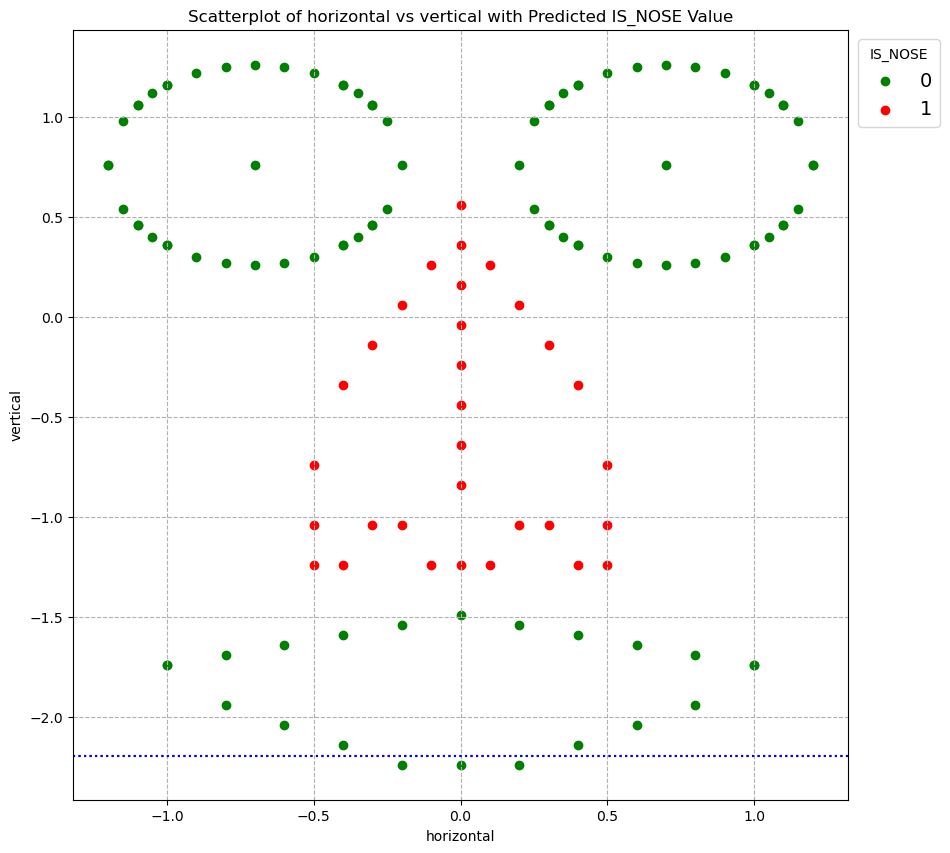

In [94]:
plt.figure(figsize=(10,10))

# A fixed point on the horizontal axis
h_point = X_train['horizontal'].mean()

# Add linear separators as dotted lines
color_map = ['green','red']
lsty = ':'
for j in range(0, 2):
   plot_data = face_data[face_data['IS_NOSE'] == j]
   plt.scatter(plot_data['horizontal'], plot_data['vertical'], label = j, color = color_map[j])
   w = BestFit.coef_[0,:]
   line_slope = - w[0] / w[1]
   v_point = line_slope * h_point - (BestFit.intercept_[0]) / w[1]
   plt.axline((h_point, v_point), slope = line_slope, linestyle = lsty, color = 'blue')
    
# Set plot labels, title, legend
plt.xlabel('horizontal')
plt.ylabel('vertical')
plt.title('Scatterplot of horizontal vs vertical with Predicted IS_NOSE Value')
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'IS_NOSE', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.show()


c) (20 points) Transform the Cartesian coordinates into the Polar coordinates.  The formulas are
r=√((x+0.2)^2+y^2 ) and θ=tan^(-1)⁡(y⁄((x+0.2) )).  We will ensure that -π<θ≤π.  Train a Support Vector Machine on the transformed data to identify the nose.  The label variable is still IS_NOSE, but the predictors are r and θ.  What is the regularization parameter value?  What is the equation of the linear separator (in Polar coordinates, of course)? What is the accuracy rate?


In [81]:
import numpy as np

# Transforming Cartesian coordinates into Polar coordinates
face_data['r'] = np.sqrt((face_data['horizontal'] + 0.2)**2 + face_data['vertical']**2)
face_data['theta'] = np.arctan2(face_data['vertical'], (face_data['horizontal'] + 0.2))


def customArcTan (z):
   theta = np.where(z > np.pi, z-2*np.pi, z)
   return (theta)

face_data['theta'] = face_data['theta'].apply(customArcTan)

In [82]:
# Split the transformed data into features (X_polar) and target (y)
X_trainpolar = face_data[['r', 'theta']]
y_trainpolar = face_data['IS_NOSE']

results = []
# Train SVM models with varying regularization parameter C for the polar coordinates
for i in np.arange(0.01, 10.01, 0.01):
    model_polar =svm.LinearSVC(dual = False, C=i, max_iter=10000, random_state=202431008)
    thisFit= model_polar.fit(X_trainpolar, y_trainpolar)
    y_pred_polar = thisFit.predict(X_trainpolar)
    accuracy_polar = accuracy_score(y_trainpolar, y_pred_polar)
    results.append({'C': round(i, 2), 'Accuracy': accuracy_polar})
    
    
results = pd.DataFrame(results)
sorted_results = results.sort_values(by=['Accuracy', 'C'], ascending=[False, True], inplace=False)
sorted_results

,C,Accuracy
754,7.55,0.976744
755,7.56,0.976744
756,7.57,0.976744
757,7.58,0.976744
758,7.59,0.976744
...,...,...
3,0.04,0.906977
4,0.05,0.906977
2,0.03,0.883721
1,0.02,0.860465


In [83]:
# Best Fit when C = 0.06
best_C = sorted_results.iloc[0]['C']
best_accuracy = sorted_results.iloc[0]['Accuracy']

# Train the best model using the best regularization parameter value
best_model =svm.LinearSVC(dual = False, C=best_C, max_iter=10000, random_state=202431008)
BestFit= best_model.fit(X_trainpolar, y_trainpolar)

# Calculate Accuracy
y_pred_polar = BestFit.predict(X_trainpolar)
accuracy_polar = accuracy_score(y_trainpolar, y_pred_polar)
face_data['y_pred_Polar'] = BestFit.predict(X_trainpolar)


print("Regularization parameter value that yields the highest accuracy =", best_C)
print("Accuracy rate:", best_accuracy)
print('Intercept = ', BestFit.intercept_)
print('Coefficients = ', BestFit.coef_)

Regularization parameter value that yields the highest accuracy = 7.55
Accuracy rate: 0.9767441860465116
Intercept =  [3.52027279]
Coefficients =  [[-4.03136969 -1.55939651]]


In [84]:
eq_str = str(BestFit.intercept_[0]) + ' + ' + str(BestFit.coef_[0][0]) + ' * X + ' + str(BestFit.coef_[0][1]) + ' * Y = 0'
print(eq_str)

3.5202727913139764 + -4.031369685766856 * X + -1.5593965094803992 * Y = 0


d)	(10 points) Generate a scatterplot of the y-coordinate and the x-coordinate (in Cartesian coordinates) with the proper legend labels.  Color-code the points by the predicted IS_NOSE values (RED for 1 and GREEN for 0).  We will need to transform the linear separator from the Polar coordinate to the Cartesian coordinates before adding it to the scatterplot.

In [85]:
r_point = face_data['r'].mean()
r_min = face_data['r'].min()
r_max = face_data['r'].max()
print("Mean of radius:", r_point)
print("Min of radius:",r_min)
print("Max of radius:",r_max)

Mean of radius: 1.17576482816438
Min of radius: 0.063
Max of radius: 2.2724808029992247


In [86]:
r_vec = np.arange(0.0, 3.05, 0.05)
t_vec = np.empty((len(r_vec), 1), dtype = float)

Intercept =  3.5202727913139764
Coefficients =  [-4.03136969 -1.55939651]


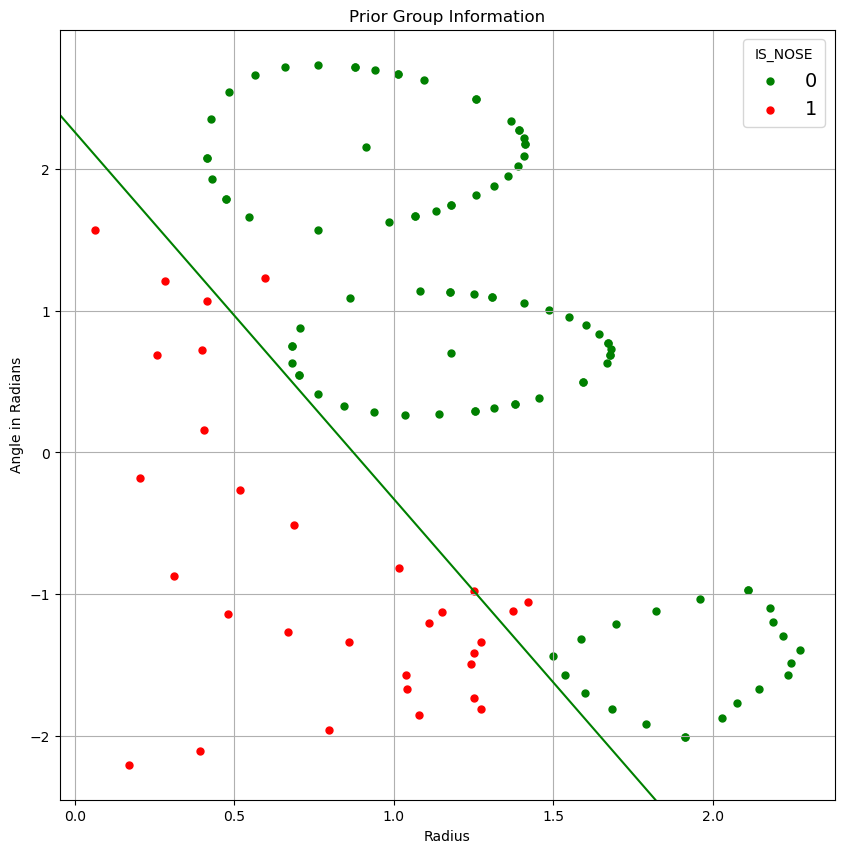

In [87]:
# Scatterplot that uses prior information of the grouping variable
color_map = ['green','red']

plt.figure(figsize=(10,10))
for i in range(2):
   subData = face_data[face_data['IS_NOSE'] == i]
   plt.scatter(x = subData['r'], y = subData['theta'], c = color_map[i], label = i, s = 25)

w0 = BestFit.intercept_[0]
wvec = BestFit.coef_[0,:]
print('Intercept = ', w0)
print('Coefficients = ', wvec)

line_slope = - wvec[0] / wvec[1]
t_point = - (w0 + wvec[0] * r_point) / wvec[1]
t_vec[:,0] = - (w0 + wvec[0] * r_vec) / wvec[1]

plt.axline((r_point, t_point), slope = line_slope, c = color_map[0])

plt.grid(True)
plt.title('Prior Group Information')
plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.legend(title = 'IS_NOSE', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()


In [88]:
x_vec1 = r_vec * np.cos(t_vec[:,0])
y_vec1 = r_vec * np.sin(t_vec[:,0])

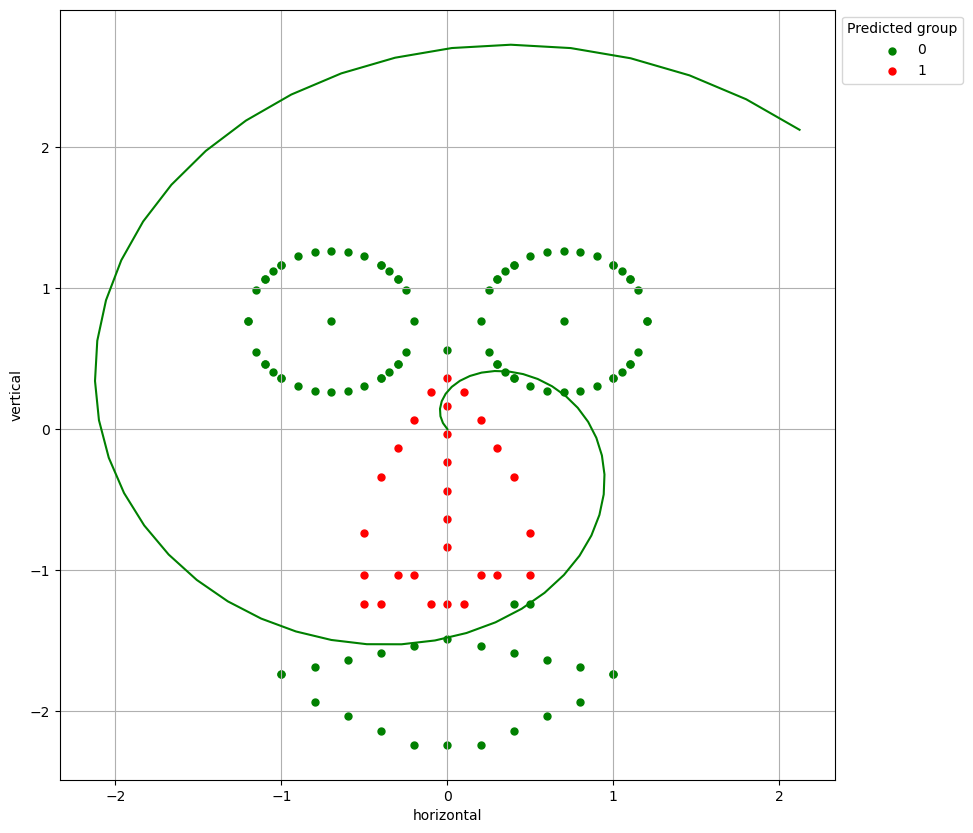

In [89]:
# plot the line, the points, and the nearest vectors to the plane
color_map = ['green', 'red']
plt.figure(figsize=(10,10))
for i in range(2):
   subData = face_data[face_data['y_pred_Polar'] == i]
   plt.scatter(x = subData['horizontal'], y = subData['vertical'], c = color_map[i], label = i, s = 25)
plt.plot(x_vec1, y_vec1, c = color_map[0])
plt.grid(True)
plt.xlabel('horizontal')
plt.ylabel('vertical')
plt.legend(loc = 'best', bbox_to_anchor = (1, 1), title = 'Predicted group')
plt.show()